### Importação de Dados

In [ ]:
import pandas as pd
from sklearn import datasets

In [ ]:
def sklearn_to_df(sklearn_dataset):
  df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
  df["target"] = pd.Series(sklearn_dataset.target)

  return df

In [ ]:
data_iris = datasets.load_iris()
df_iris = sklearn_to_df(data_iris)

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
target_names = data_iris.target_names

In [ ]:
print(target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
df_iris["target_names"] = None

In [ ]:
df_iris.iloc[df_iris.loc[df_iris["target"] == 0].index, 5] = target_names[0]
df_iris.iloc[df_iris.loc[df_iris["target"] == 1].index, 5] = target_names[1]
df_iris.iloc[df_iris.loc[df_iris["target"] == 2].index, 5] = target_names[2]

In [ ]:
del(df_iris["target"])

### Análise Exploratória

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_iris.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target_names         False
dtype: bool

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

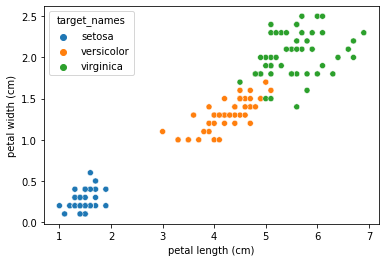

In [ ]:
sns.scatterplot(data=df_iris, x="petal length (cm)", y="petal width (cm)", hue="target_names")
plt.show()

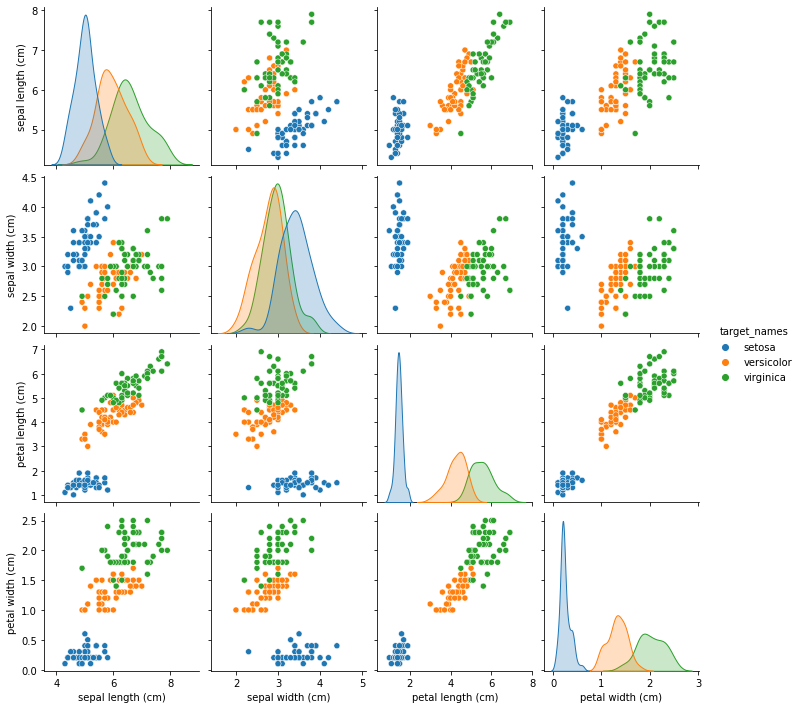

In [ ]:
sns.pairplot(df_iris, hue="target_names")

### Criação e Treinamento de Modelo

#### Divisão de dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data_iris.data, data_iris.target, test_size=0.2)

In [ ]:
print("Treino: ", len(x_treino))
print("Teste: ", len(x_teste))

Treino:  120
Teste:  30


#### Criação do Modelo

In [ ]:
from sklearn import tree

In [ ]:
modelo = tree.DecisionTreeClassifier()
modelo = modelo.fit(x_treino, y_treino)

#### Predições

In [ ]:
y_predicao = modelo.predict(x_teste)

In [ ]:
y_predicao

array([2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 0, 1, 1])

#### Avaliar o Modelo

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_teste, y_predicao, target_names=target_names)

In [ ]:
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.85      0.85      0.85        13
   virginica       0.85      0.85      0.85        13

    accuracy                           0.87        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.87      0.87      0.87        30

